# Import libraries we need for this project

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time

### Specify the file contain our data.

In [2]:
filename ="Weather_Data.csv"

### Read This into a Panda DataFrame

In [3]:
df = pd.read_csv("Weather_Data.csv")

In [4]:
print('Loaded {} records from {}.\n'.format(len(df), filename))

Loaded 3271 records from Weather_Data.csv.



### Check that we have loaded the correct data

In [5]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### For Regression we need to convert some categorical data to binary in order for the model to work. In our case RainToday,WindGustDir,WindDir9am,WindDir3pm. We perform one hot encoding 

In [6]:
df_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

## Reconfirm our data is in shape

In [7]:
df_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


### We also change the RainTommorow Column to binary from "Yes" and "No" for regression

In [8]:
df_processed.replace(['No', 'Yes'], [0,1], inplace=True)

C:\Users\Admin.DESKTOP-QVO174E\AppData\Local\Temp\ipykernel_10344\1204962372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed.replace(['No', 'Yes'], [0,1], inplace=True)


# Prepare our data for Training and Testing

In [9]:
df_processed.drop('Date',axis=1,inplace=True)

In [10]:
df_processed = df_processed.astype(float)

In [11]:
x_values = df_processed.drop(columns='RainTomorrow', axis=1)

In [12]:
y_values = df_processed['RainTomorrow']

# Random Forests 

### We split the data for training and testing set to make it 20% for testing and 80% for Training

In [13]:
x_train, x_test, y_train, y_test =  train_test_split(x_values,y_values , random_state=10,test_size=0.2, shuffle=True)

## Create a random forest model

In [14]:
forest = RandomForestClassifier(n_estimators = 100,
                                criterion = 'gini',
                                max_depth = 6,
                                min_samples_leaf = 10,
                                min_samples_split = 78,
                                bootstrap = True,
                                oob_score = True,
                                random_state = 1912)

forest.fit(x_train, np.ravel(y_train))

prediction = forest.predict(x_test)

# Score using the validation data.
score = forest.score(x_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 83%


# Compute accuracy, precision, recall, and F<sub>1</sub> score

In [15]:
def model_scores(y, prediction):
    acc = accuracy_score(y, prediction)
    print('Accuracy: {:.0f}%'.format(np.round(acc * 100)))
    
    precision = precision_score(y, prediction)
    print('Precision: {:.0f}%'.format(np.round(precision * 100)))
    
    recall = recall_score(y, prediction)
    print('Recall: {:.0f}%'.format(np.round(recall * 100)))
    
    f1 = f1_score(y, prediction)
    print('F1: {:.0f}%'.format(np.round(f1 * 100)))
    
print('The function to show the scores has been defined.')

The function to show the scores has been defined.


# Generate a ROC curve and compute the AUC

In [16]:
def roc(y, prediction_proba):
    fpr, tpr, thresholds = roc_curve(y, prediction_proba)
    
    plt.plot(fpr, tpr);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('ROC Curve');
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.grid(True);
    
    auc = roc_auc_score(y, prediction_proba)
    print('Area Under Curve: {:.2f}'.format(auc))
    
print('The function to generate the ROC curve and compute AUC has been defined.')

The function to generate the ROC curve and compute AUC has been defined.


# Generate a precision–recall curve and compute the average precision

In [17]:
def prc(y, prediction_proba):
    precision, recall, thresholds = precision_recall_curve(y, prediction_proba)
    
    plt.plot(recall, precision);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('Precision–Recall Curve');
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    plt.grid(True);
    
    ap = average_precision_score(y, prediction_proba)
    print('Average Precision: {:.2f}'.format(ap))
    
print('The function to generate a PRC and compute average precision has been defined.')

The function to generate a PRC and compute average precision has been defined.


# Evaluate the random forest model

In [18]:
model_scores(y_test, prediction)

Accuracy: 83%
Precision: 79%
Recall: 52%
F1: 63%


Area Under Curve: 0.87


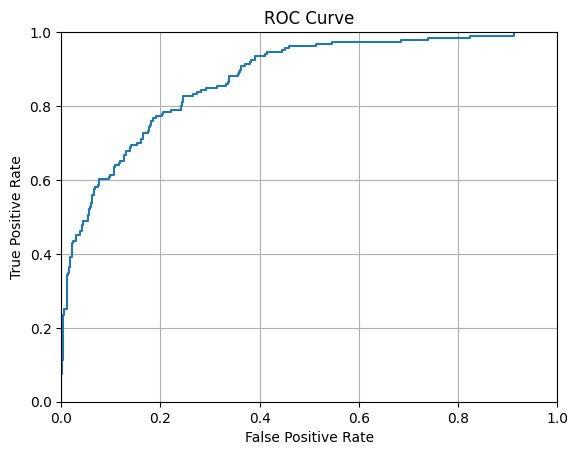

In [19]:
predict_proba = forest.predict_proba(x_test)

roc(y_test, predict_proba[:, 1])

Average Precision: 0.76


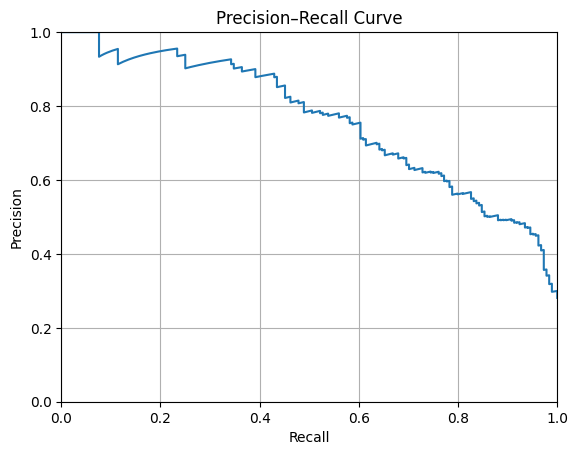

In [20]:
prc(y_test, predict_proba[:, 1])

# Generate the out-of-bag error and decision function

In [21]:
oob_error = 1 - forest.oob_score_
print('Out-of-bag error: {}'.format(round(oob_error, 3)))

Out-of-bag error: 0.164
